In [1]:
import numpy as np
from sklearn.datasets import load_digits, load_wine
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



In [2]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().set_output(transform="pandas")

digits = load_wine()
X, y = digits.data ,digits.target
X = scaler.fit_transform(X)

# _, axes = plt.subplots(nrows=1, ncols=5, figsize=(8, 3))
# for ax, image, label in zip(axes, digits.images, digits.target):
#     ax.set_axis_off()
#     ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
#     ax.set_title("Training: %i" % label)

In [3]:
# Create a classifier: a support vector classifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, shuffle=False
)

# Create a classifier: a support vector classifier
# clf = SVC(gamma=0.001)
clf = KNeighborsClassifier(n_neighbors=20)
# clf = MLPClassifier(max_iter=1000, random_state=1)

kfold = KFold(n_splits=5)
accuracies = cross_val_score(clf, X_train, y_train, cv=kfold)
print(f'[model]: {5} particiones -> Accuracy: {accuracies}')
print(f'Mean Accuracy: {np.mean(accuracies):.2f}, Variance: {np.var(accuracies):.4f}')


[model]: 5 particiones -> Accuracy: [1.         1.         1.         0.5        0.05882353]
Mean Accuracy: 0.71, Variance: 0.1441


In [4]:
# Predict the value of the digit on the test subset
clf.fit(X_train,y_train)
predicted = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier KNeighborsClassifier(n_neighbors=20):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.51      0.78      0.62        41
           2       0.00      0.00      0.00        48

    accuracy                           0.36        89
   macro avg       0.17      0.26      0.21        89
weighted avg       0.23      0.36      0.28        89




/home/axelrue/Documents/environments/general/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/axelrue/Documents/environments/general/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/axelrue/Documents/environments/general/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

Text(0.5, 0.98, 'Confusion Matrix')

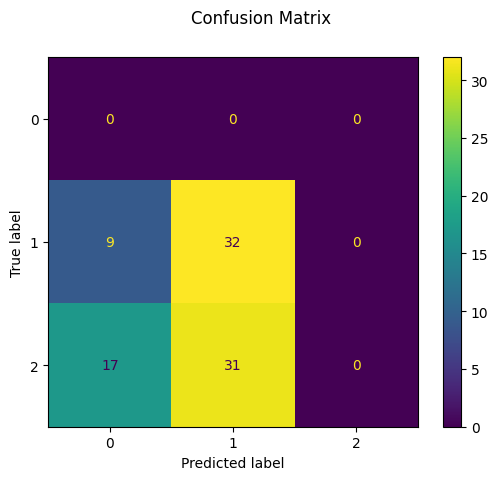

In [5]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

In [6]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = load_wine(return_X_y=True, as_frame=True)
scaler = StandardScaler().set_output(transform="pandas")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)
scaled_X_train = scaler.fit_transform(X_train)

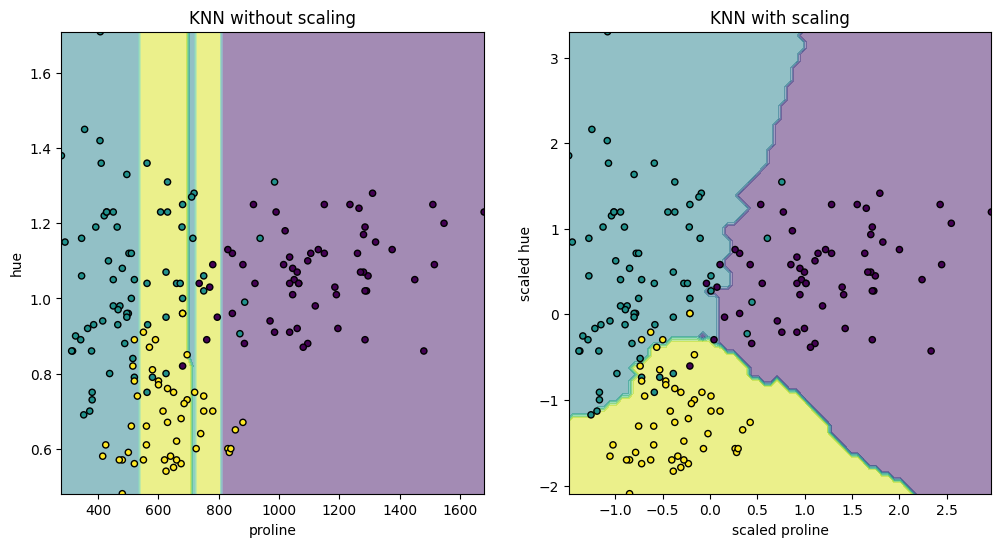

In [7]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

X_plot = X[["proline", "hue"]]
X_plot_scaled = scaler.fit_transform(X_plot)
clf = KNeighborsClassifier(n_neighbors=20)


def fit_and_plot_model(X_plot, y, clf, ax):
    clf.fit(X_plot, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_plot,
        response_method="predict",
        alpha=0.5,
        ax=ax,
    )
    disp.ax_.scatter(X_plot["proline"], X_plot["hue"], c=y, s=20, edgecolor="k")
    disp.ax_.set_xlim((X_plot["proline"].min(), X_plot["proline"].max()))
    disp.ax_.set_ylim((X_plot["hue"].min(), X_plot["hue"].max()))
    return disp.ax_


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

fit_and_plot_model(X_plot, y, clf, ax1)
ax1.set_title("KNN without scaling")

fit_and_plot_model(X_plot_scaled, y, clf, ax2)
ax2.set_xlabel("scaled proline")
ax2.set_ylabel("scaled hue")
_ = ax2.set_title("KNN with scaling")

---
# Redes de hopfield

In [8]:
num_neuronas = 9
mem_limit = num_neuronas/(2*np.log(num_neuronas))
print(mem_limit)

2.048038259910384


In [9]:
signo = lambda x: (x/abs(x)).astype(int)

# Patrones fundamentales
X = np.array([[1, 1, 1, -1], [-1, -1, -1, 1]])

In [10]:
w = np.zeros([X.shape[1], X.shape[1]])

for x in X:
    w += np.transpose([x]) @ np.array([x])

np.fill_diagonal(w,0)
w *= (1/X.shape[1])
w

array([[ 0. ,  0.5,  0.5, -0.5],
       [ 0.5,  0. ,  0.5, -0.5],
       [ 0.5,  0.5,  0. , -0.5],
       [-0.5, -0.5, -0.5,  0. ]])

In [11]:
x = np.array([0.9, 0.7, 1.99, -0.3])

signo(x @ w)

array([ 1,  1,  1, -1])

---
# RBF

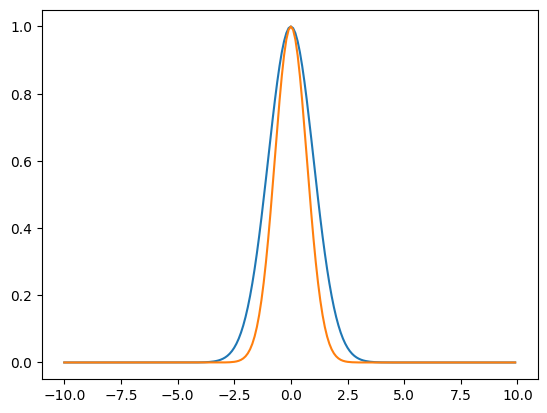

In [12]:
campana = lambda x,mu,sig: np.exp(-(x-mu)**2/(2*sig**2))
campana1 = lambda x,mu,sig: np.exp(-(x-mu)**2/(1*sig**2))

x = np.arange(-10,10,0.1)

plt.plot(x,campana(x,0,1))
plt.plot(x,campana1(x,0,1))
# plt.plot(x,campana(x,1,2))
plt.show()